<a href="https://colab.research.google.com/github/intimanjunath/deep-learning-keras-hub-teachable-machine/blob/main/teachable_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Human vs Object Image Classifier with TensorFlow Compatibility - Teachable Machine models

In [ ]:
# Install required libraries
!pip install tensorflowjs Pillow numpy matplotlib

import tensorflow as tf
import tensorflowjs as tfjs
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load your model from the uploaded files in Colab environment
model = tfjs.converters.load_keras_model('/content/model.json')

# Confirm model loaded successfully
model.summary()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 75.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found exis

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 2)                 128300    
                                                                 
Total params: 538508 (2.05 MB)
Trainable params: 524428 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [ ]:
# Check if the image downloaded successfully
from PIL import Image
img = Image.open('/content/human_face.jpg')
img.show()

# Correct preprocessing function (ensuring RGB channels explicitly)
def preprocess_image(img_path):
    img = Image.open(img_path).resize((224, 224)).convert('RGB')  # Ensure RGB mode
    img_array = np.array(img) / 255.0
    return np.expand_dims(img_array, axis=0)  # Ensure shape: (1, 224, 224, 3)

# Verify shape
test_img = preprocess_image('/content/human_face.jpg')
print("Processed image shape:", test_img.shape)  # Must print: (1, 224, 224, 3)

Processed image shape: (1, 224, 224, 3)


1/1 [==============================] - 0s 22ms/step


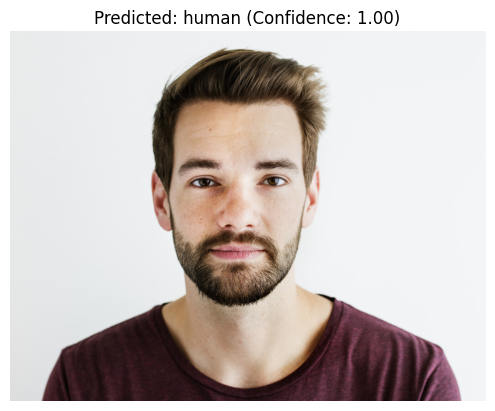

Predicted class: human, Confidence: 1.00


In [ ]:
# Predict class
predictions = model.predict(test_img)
labels = ['human', 'object']

# Clearly display the results
pred_label = labels[np.argmax(predictions)]
confidence = np.max(predictions)

plt.imshow(Image.open('/content/human_face.jpg'))
plt.title(f"Predicted: {pred_label} (Confidence: {confidence:.2f})")
plt.axis('off')
plt.show()

print(f"Predicted class: {pred_label}, Confidence: {confidence:.2f}")

Bottle image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 24ms/step


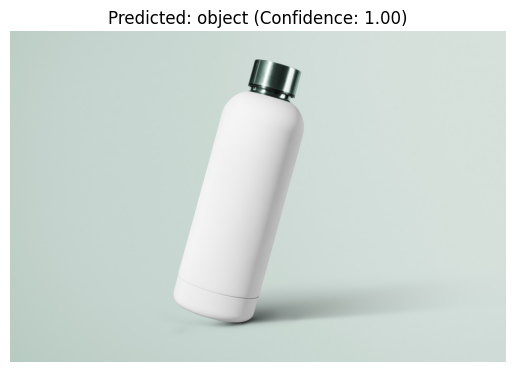

Predicted class: object, Confidence: 1.00


In [ ]:
# Preprocess the bottle image
bottle_img = preprocess_image('bottle.jpg')
print("Bottle image shape:", bottle_img.shape)

# Predict using your model
predictions = model.predict(bottle_img)
labels = ['human', 'object']

# Visualize clearly the prediction
pred_label = labels[np.argmax(predictions)]
confidence = np.max(predictions)

plt.imshow(Image.open('bottle.jpg'))
plt.title(f"Predicted: {pred_label} (Confidence: {confidence:.2f})")
plt.axis('off')
plt.show()

print(f"Predicted class: {pred_label}, Confidence: {confidence:.2f}")

#Video-based (Pose) Classification with TensorFlow Compatibility - Teachable Machine models

In [ ]:
# Install dependencies
!pip install tensorflowjs opencv-python matplotlib

# Import libraries
import tensorflow as tf
import tensorflowjs as tfjs
import numpy as np
import json
import cv2
import matplotlib.pyplot as plt

# Load your Teachable Machine Pose Model
model = tfjs.converters.load_keras_model('/content/model.json')

# Load metadata (class labels clearly)
with open('/content/metadata.json', 'r') as f:
    metadata = json.load(f)

labels = metadata['labels']
print("Class Labels clearly loaded:", labels)

# Confirm model is loaded successfully
model.summary()


Class Labels clearly loaded: ['Standing', 'Arms raised']
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_Dense1 (Dense)        (None, 100)               1474000   
                                                                 
 dropout_Dropout1 (Dropout)  (None, 100)               0         
                                                                 
 dense_Dense2 (Dense)        (None, 2)                 200       
                                                                 
Total params: 1474200 (5.62 MB)
Trainable params: 1474200 (5.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Install TF Hub for MoveNet
!pip install tensorflow_hub

import tensorflow_hub as hub

# Load MoveNet pose estimation model (for generating keypoints)
movenet = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")

# Function clearly defined for pose estimation
def detect_pose(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (192, 192))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    input_img = tf.expand_dims(img_rgb, axis=0)
    keypoints = movenet.signatures['serving_default'](input_img)
    keypoints = keypoints['output_0'].numpy()
    return keypoints.flatten()

# Verify MoveNet clearly loaded
print("MoveNet loaded successfully.")

MoveNet loaded successfully.


In [ ]:
# Verify clearly that image downloaded correctly
import os
print("File exists:", os.path.exists('/content/stand.png'))

File exists: True


Image loaded successfully clearly: (1706, 1538, 3)


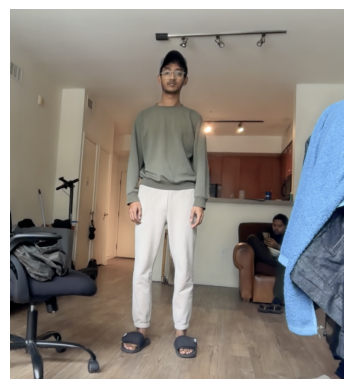

In [ ]:
img = cv2.imread('/content/stand.png')
if img is None:
    print("Failed to load image clearly, please check download again.")
else:
    print("Image loaded successfully clearly:", img.shape)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [ ]:
def detect_pose(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (192, 192))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    input_img = tf.expand_dims(tf.cast(img_rgb, tf.int32), axis=0)  # Fix: explicitly cast to int32
    keypoints = movenet.signatures['serving_default'](input=input_img)
    keypoints = keypoints['output_0'].numpy()
    return keypoints.flatten()

In [ ]:
# Clearly prepare a simple demo dataset (local files)
pose_images = {
    'Standing': ['/content/stand.png'],
    'Arms_raised': ['/content/arms.png']
}

X, y = [], []
label_map = {'Standing': 0, 'Arms_raised': 1}

for label, filepaths in pose_images.items():
    for filepath in filepaths:
        print(f"Processing clearly: {filepath}")
        keypoints = detect_pose(filepath)
        X.append(keypoints)
        y.append(label_map[label])

X = np.array(X)
y = np.array(y)

print("Dataset shape clearly:", X.shape, y.shape)

Processing clearly: /content/stand.png
Processing clearly: /content/arms.png
Dataset shape clearly: (2, 51) (2,)


In [ ]:
# Simple and effective classifier (clearly Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Train classifier
classifier = LogisticRegression().fit(X, y)

# Quick evaluation clearly
accuracy = classifier.score(X, y)
print(f"Classifier trained clearly with accuracy: {accuracy:.2f}")

Classifier trained clearly with accuracy: 1.00


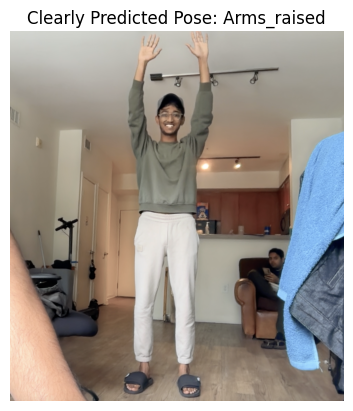

Clearly Predicted Pose: Arms_raised


In [ ]:
# Use previously downloaded image clearly for testing
test_img_path = '/content/arms.png'  # Ensure this image exists, or update the path clearly

# Extract keypoints
test_keypoints = detect_pose(test_img_path).reshape(1, -1)

# Make prediction clearly
pred = classifier.predict(test_keypoints)[0]
pred_label = [k for k, v in label_map.items() if v == pred][0]

# Display clearly the predicted pose
img = cv2.cvtColor(cv2.imread(test_img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Clearly Predicted Pose: {pred_label}")
plt.axis('off')
plt.show()

print(f"Clearly Predicted Pose: {pred_label}")

#Text-based classification

In [ ]:
# Corrected installation clearly
!pip install tensorflow==2.15.0 tensorflow-hub numpy pandas scikit-learn

  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.3 MB)
Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl (30 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.15.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tf_keras~=2.19, but you have tf-keras 2.15.1 which is incompatible.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, but you have tf-keras 2.15.1 which is incompatible.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

print("Imports successful clearly!")

# Load Universal Sentence Encoder clearly
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
print("Universal Sentence Encoder loaded clearly!")

Imports successful clearly!
Universal Sentence Encoder loaded clearly!


In [ ]:
# Simple example dataset clearly
sentences = [
    "I love this product, it's amazing!",  # Positive
    "Fantastic experience, highly recommend!",  # Positive
    "I am not happy with this.",  # Negative
    "It is really bad, very disappointing.",  # Negative
]

labels = ["Positive", "Positive", "Negative", "Negative"]

# Convert labels clearly into numeric form
label_map = {"Positive": 1, "Negative": 0}
y = np.array([label_map[label] for label in labels])

print("Dataset prepared clearly!")

Dataset prepared clearly!


In [ ]:
# Generate sentence embeddings clearly using USE
X_embeddings = embed(sentences).numpy()
print("Embeddings shape clearly:", X_embeddings.shape)

Embeddings shape clearly: (4, 512)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train simple classifier (Logistic Regression)
classifier = LogisticRegression().fit(X_embeddings, y)

# Predict on the training data clearly
y_pred = classifier.predict(X_embeddings)

# Evaluate clearly with a classification report
report = classification_report(y, y_pred, target_names=["Negative", "Positive"])
print("Classification Report clearly:\n", report)

Classification Report clearly:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         2
    Positive       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

